In [1]:
import numpy as np
import matplotlib.pyplot as plt

## yhat = w*x + b + error   error: 잔차

In [11]:
# y=3+2x+가우시안노이즈
x = 2*np.random.rand(100,1) 
y = 3+6*x + np.random.randn(100,1)# randn (normal distribution) 평균: 0, 표준편차: 1
# yhat = w*x + b + error   error: 잔차

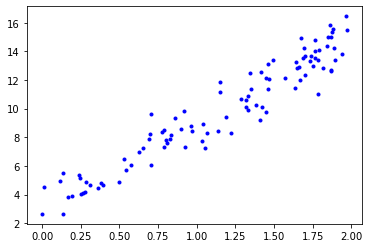

In [12]:
plt.plot(x,y,'b.')

In [19]:
x_b = np.c_[np.ones((100,1)),x] # 100,1짜리가 2개를 np.c_를 통해 컬럼을 기준으로 합침!

In [31]:
# 역행렬 만드는 코드 np.linalg.inv()
# a.dot(b): a dot b
myweights = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
myweights # 최적의 w와 b를 찾음

array([[3.02354774],
       [5.95389554]])

In [66]:
# 만약 x가 2일때 y예측?
xdata=np.array([[0],[2]])
xNew = np.c_[np.ones((2,1)),xdata]

In [67]:
pred = xNew.dot(myweights)
pred

array([[ 3.02354774],
       [14.93133883]])

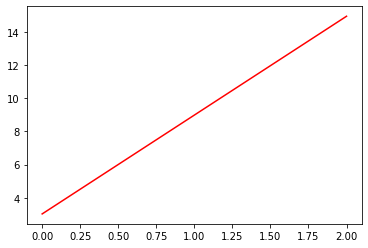

In [69]:
plt.plot(xdata, pred, 'r-')

## 다항 회귀

In [37]:
# 모델 → yhat = 0.5x^2 + x + 2 + 가우시안노이즈

In [57]:
x = 6*np.random.rand(100,1) - 3

In [58]:
y = 0.5 * x ** 2 + x + 2 + np.random.randn(100,1)

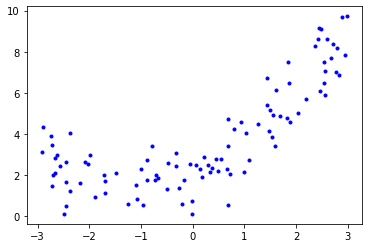

In [72]:
plt.plot(x,y,'b.')

plt.show()

In [73]:
x.shape

(100, 1)

In [74]:
y.shape

(100, 1)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [77]:
x = 6*np.random.rand(100,1)-3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(100,1)

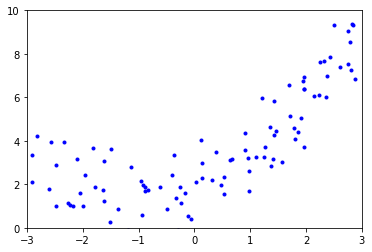

In [78]:
plt.plot(x,y,'b.')
plt.axis([-3,3,0,10])
plt.show()

## 사이킷런을 이용해서 다항회귀

In [79]:
poly_features = PolynomialFeatures(degree = 2, include_bias= False)
x_ploy = poly_features.fit_transform(x)

In [81]:
x_ploy.shape

(100, 2)

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(x_ploy,y)

LinearRegression()

In [85]:
lin_reg.intercept_ # 상수항 2

array([1.82181798])

In [87]:
lin_reg.coef_ # 계수 # x항은 1, x^2은 0.5

array([[0.98931996, 0.50226309]])

In [91]:
xNew = np.linspace(-3,3,100).reshape(100,1)

In [95]:
xNewPoly = poly_features.transform(xNew)

In [97]:
yPred = lin_reg.predict(xNewPoly)

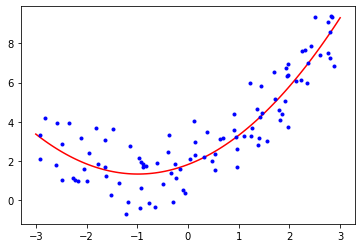

In [101]:
plt.plot(xNew,yPred,'r-')
plt.plot(x,y,'b.')

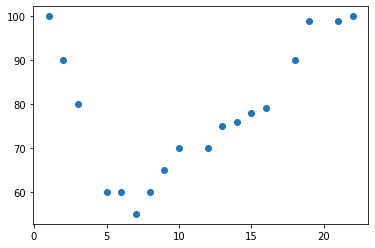

In [102]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()


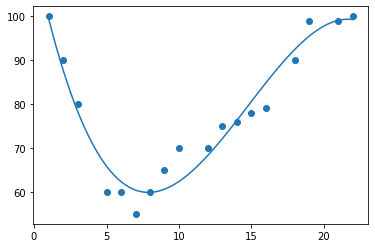

In [108]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()


## 역전개

In [109]:
t1 =  np.array([
                    [ 1,    1000],
                    [ 5,   10000],
                    [10,  100000],
               ])
t2 =  np.array([
                    [  2,    100],
                    [ 15,  20000],
                    [100, 300000],
               ])


In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
mms = MinMaxScaler()

In [112]:
mms.fit(t1)

MinMaxScaler()

In [113]:
res = mms.transform(t1)
res

array([[0.        , 0.        ],
       [0.44444444, 0.09090909],
       [1.        , 1.        ]])

In [114]:
print(mms.inverse_transform(res))

[[1.e+00 1.e+03]
 [5.e+00 1.e+04]
 [1.e+01 1.e+05]]


In [116]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM
import numpy as np

x = np.array([[[1.],[2.],[3.],[4.],[5.]]])
y = np.array([6.])

xInput = Input(batch_shape=(None,5,1))
xLstm = LSTM(3)(xInput)
xOutput = Dense(1)(xLstm)

model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

model.fit(x,y,epochs=50,batch_size=1,verbose=0)
model.predict(x,batch_size=1)


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


array([[0.3014869]], dtype=float32)

In [119]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, TimeDistributed
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[[2.], [3.], [4.], [5.], [6.]]])
xInput = Input(batch_shape=(None, 5, 1))
xLstm = LSTM(3, return_sequences=True)(xInput)
xOutput = TimeDistributed(Dense(1))(xLstm)
model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 3)              60        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 1)              4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.fit(x,y,epochs=50,batch_size=1,verbose=0)
model.predict(x,batch_size=1)

array([[[0.13959719],
        [0.25021866],
        [0.30555868],
        [0.3174666 ],
        [0.31001458]]], dtype=float32)